In [1]:
#Google drive save session
import os
import dill
from google.colab import drive

backup_dir = 'drive/My Drive/coadalab/malayalam'
backup_file = 'notebook_env.db'
backup_path = backup_dir + '/' + backup_file

def init_drive():
  # create directory if not exist
  drive.mount('drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path)

def load_session():
  init_drive()
  dill.load_session(backup_path)

In [2]:
# And pandas for data import
import pandas as pd

In [4]:
# Import Files
import os

# Import data from csv
data = pd.read_csv("/tmp/mal_full_offensive_train.csv")
data_dev = pd.read_csv("/tmp/mal_full_offensive_dev.csv")

# Select required columns
data = data[['text', 'label']]
data_dev = data_dev[['text', 'label']]

# Remove a row if any of the two remaining columns are missing
data = data.dropna();
data_dev = data_dev.dropna()

print(data)
print(data_dev)

                                                    text          label
0      പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്ത...  Not_offensive
1      ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...  Not_offensive
2      ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...  Not_offensive
3              Sushin syam  Shaiju khalid  Midhun manual  Not_offensive
4                              J A K E S.   B EJ O Y !!!  Not_offensive
...                                                  ...            ...
16005  കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...  Not_offensive
16006  ente mammookka ningal puliyalla oru simhama......  Not_offensive
16007  Lucifer mass dialogues Ellam onnu comment chey...  Not_offensive
16008                Like from Madurai (Tamil nadu) ....  not-malayalam
16009  അടിമകൾ ആയി ജീവിച്ചു മാറിക്കയല്ല ചാവേറായി ചാവാറ...  Not_offensive

[16010 rows x 2 columns]
                                                   text          label
0     Gopichettante BGM um mammookayum 

In [5]:
# copy + klearn because you allways need sklearn
import copy
from sklearn.model_selection import train_test_split

In [6]:
# Remove rows, where the label is present only ones (can't be split)
data = data.groupby('label').filter(lambda x : len(x) > 1)
data_dev = data_dev.groupby('label').filter(lambda x : len(x) > 1)

# Remove rows, where the label is present only in the array
data = data[data.label.isin(['Not_offensive', 'Offensive_Targeted_Insult_Other', 'Offensive_Targeted_Insult_Individual', 'Offensive_Targeted_Insult_Group', 'not-malayalam', 'Offensive_Untargetede'])]
data_dev = data_dev[data_dev.label.isin(['Not_offensive', 'Offensive_Targeted_Insult_Other', 'Offensive_Targeted_Insult_Individual', 'Offensive_Targeted_Insult_Group', 'not-malayalam', 'Offensive_Untargetede'])]

# Set your model output as categorical and save in new label col
data['label_label'] = pd.Categorical(data['label'])
data_dev['label_label'] = pd.Categorical(data_dev['label'])

# Transform your output to numeric
data['label'] = data['label_label'].cat.codes
data_dev['label'] = data_dev['label_label'].cat.codes

print(data)
print(data_dev)

                                                    text  label    label_label
0      പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്ത...      0  Not_offensive
1      ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവ...      0  Not_offensive
2      ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്...      0  Not_offensive
3              Sushin syam  Shaiju khalid  Midhun manual      0  Not_offensive
4                              J A K E S.   B EJ O Y !!!      0  Not_offensive
...                                                  ...    ...            ...
16005  കട്ട ലാലേട്ടൻ ഫാൻസിന് ദൈവത്തെ ഓർത്ത് അമിത പ്രത...      0  Not_offensive
16006  ente mammookka ningal puliyalla oru simhama......      0  Not_offensive
16007  Lucifer mass dialogues Ellam onnu comment chey...      0  Not_offensive
16008                Like from Madurai (Tamil nadu) ....      4  not-malayalam
16009  അടിമകൾ ആയി ജീവിച്ചു മാറിക്കയല്ല ചാവേറായി ചാവാറ...      0  Not_offensive

[15993 rows x 3 columns]
                          

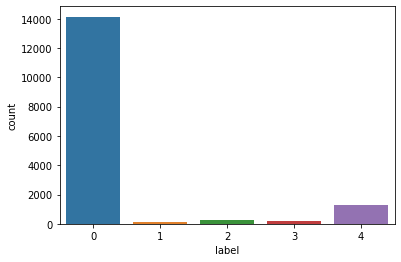

In [7]:
#Plot the bar chart of Train
import seaborn as sns

sns.countplot(x='label', data=data)

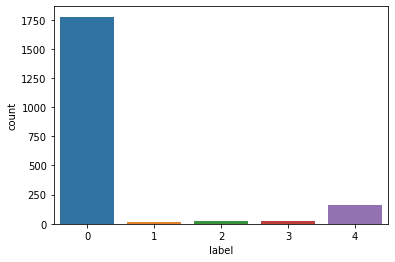

In [8]:
#Plot the bar chart of Dev
sns.countplot(x='label', data=data_dev)

In [9]:
# Load Huggingface transformers
!pip install transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast
from tensorflow.keras.models import Model

     |████████████████████████████████| 1.5MB 13.4MB/s 
     |████████████████████████████████| 2.9MB 57.6MB/s 
     |████████████████████████████████| 890kB 52.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=01f63f6514e2ced1108a0e68b5f5bb7dd93460b2e7a0377c49b68569ee89bf69
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [10]:
#Setup BERT

# Name of the BERT model to use
model_name = 'bert-base-multilingual-cased'

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [11]:
# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.initializers import TruncatedNormal

In [12]:
#Build the model 

# Load the MainLayer
bert = transformer_model.layers[0]

# Max length of tokens
max_length = 100

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32')
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
label = Dense(units=len(data.label_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='class_type')(pooled_output)
outputs = {'label': label}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='bert-base-multilingual-cased')

# Take a look at the model
model.summary()

Model: "bert-base-multilingual-cased"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 177853440   attention_mask[0][0]             
                                                                 input_ids[0][0]                  
__________________________________________________________________________________________________
pooled_output (Dropout)         (None, 768)          0           bert[0

In [13]:
#Import Keras Libraries
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [14]:
#Train the model

# Set an optimizer
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = {'label': CategoricalCrossentropy(from_logits = True)}
metric = {'label': CategoricalAccuracy('accuracy')}

# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = metric)

# Ready output data for the model
y_label = to_categorical(data['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

model.save("/tmp/text-classification-malayalam.h5")

Epoch 1/50
200/200 [==============================] - 114s 466ms/step - loss: 0.4587 - accuracy: 0.8793 - val_loss: 0.2933 - val_accuracy: 0.9290
Epoch 2/50
200/200 [==============================] - 90s 452ms/step - loss: 0.2496 - accuracy: 0.9410 - val_loss: 0.2411 - val_accuracy: 0.9390
Epoch 3/50
200/200 [==============================] - 90s 451ms/step - loss: 0.1834 - accuracy: 0.9562 - val_loss: 0.2237 - val_accuracy: 0.9406
Epoch 4/50
200/200 [==============================] - 90s 451ms/step - loss: 0.1539 - accuracy: 0.9621 - val_loss: 0.2185 - val_accuracy: 0.9419
Epoch 5/50
200/200 [==============================] - 90s 451ms/step - loss: 0.1299 - accuracy: 0.9643 - val_loss: 0.2380 - val_accuracy: 0.9369
Epoch 6/50
200/200 [==============================] - 90s 452ms/step - loss: 0.1110 - accuracy: 0.9715 - val_loss: 0.2212 - val_accuracy: 0.9456
Epoch 7/50
200/200 [==============================] - 90s 451ms/step - loss: 0.0944 - accuracy: 0.9745 - val_loss: 0.2388 - val_a

In [39]:
#Model 2
# Ready output data for the model
y_label = to_categorical(data_dev['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data_dev['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

Epoch 1/50
25/25 [==============================] - 11s 455ms/step - loss: 0.2852 - accuracy: 0.9492 - val_loss: 0.2147 - val_accuracy: 0.9675
Epoch 2/50
25/25 [==============================] - 11s 455ms/step - loss: 0.2419 - accuracy: 0.9555 - val_loss: 0.2008 - val_accuracy: 0.9675
Epoch 3/50
25/25 [==============================] - 11s 454ms/step - loss: 0.2066 - accuracy: 0.9593 - val_loss: 0.1899 - val_accuracy: 0.9700
Epoch 4/50
25/25 [==============================] - 11s 454ms/step - loss: 0.1922 - accuracy: 0.9599 - val_loss: 0.1785 - val_accuracy: 0.9675
Epoch 5/50
25/25 [==============================] - 11s 454ms/step - loss: 0.1666 - accuracy: 0.9643 - val_loss: 0.1678 - val_accuracy: 0.9700
Epoch 6/50
25/25 [==============================] - 11s 454ms/step - loss: 0.1654 - accuracy: 0.9593 - val_loss: 0.1618 - val_accuracy: 0.9700
Epoch 7/50
25/25 [==============================] - 11s 454ms/step - loss: 0.1448 - accuracy: 0.9668 - val_loss: 0.1651 - val_accuracy: 0.9675

In [41]:
#Model 3
# Ready output data for the model
y_label = to_categorical(data['label'])

# Tokenize the input (takes some time)
x = tokenizer(
    text=data['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Fit the model
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    y={'label': y_label},
    validation_split=0.2,
    batch_size=64,
    epochs=50)

Epoch 1/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.2436 - val_accuracy: 0.9631
Epoch 2/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.2418 - val_accuracy: 0.9634
Epoch 3/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.2446 - val_accuracy: 0.9631
Epoch 4/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.2462 - val_accuracy: 0.9641
Epoch 5/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.2456 - val_accuracy: 0.9641
Epoch 6/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.2489 - val_accuracy: 0.9625
Epoch 7/50
200/200 [==============================] - 90s 452ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.2481 - val_ac

In [42]:
model.save("/tmp/text-classification-malayalam.h5")
#Evaluate the model

# Ready test data`
test_y_label = to_categorical(data_dev['label'])
test_x = tokenizer(
    text=data_dev['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


# Run evaluation
model_eval = model.evaluate(
    x={'input_ids': test_x['input_ids'], 'attention_mask': test_x['attention_mask']},
    y={'label': test_y_label}
)

63/63 [==============================] - 5s 85ms/step - loss: 0.0981 - accuracy: 0.9840


In [43]:
#History object
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
#import matplotlib
from matplotlib import pyplot as plt

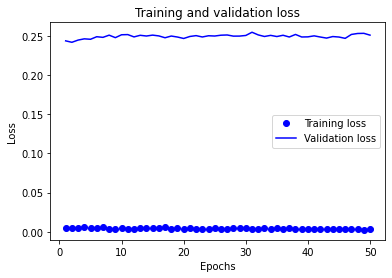

In [45]:
#plot the training and validation loss for comparison

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

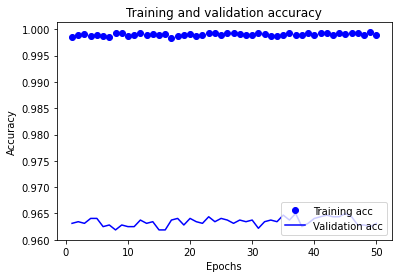

In [46]:
#plot the training and validation accuracy for comparison
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [50]:
#Model Prediction
data_test = pd.read_csv("/tmp/mal_full_offensive_test.csv")

# Select required columns
data_test = data_test[['text']]

# Remove a row if any of the three remaining columns are missing
data_test = data_test.dropna()

test_x = tokenizer(
    text=data_test['text'].to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

predictions = model.predict({'input_ids': test_x['input_ids'], 'attention_mask': test_x['attention_mask']})
  

In [51]:
print(len(data_test))
print(predictions['label'])

2001
[[ 7.894426   -2.7112906  -1.7152427  -1.2628812  -2.469767  ]
 [ 7.5696363  -2.2972863  -1.9287362  -0.40263057 -3.067298  ]
 [ 6.757382   -1.9493637   0.12304313 -1.4993792  -3.6944978 ]
 ...
 [ 7.9810247  -2.3950832  -1.8260133  -1.2898439  -2.752025  ]
 [ 7.88498    -2.4363232  -1.438932   -1.1393209  -3.052976  ]
 [ 7.9924555  -2.553345   -1.878277   -1.2250415  -2.5541284 ]]


In [48]:
#import Numpy
import numpy as np

In [52]:
#Write out to the csv file
arry = []

data_test = np.array(data_test)
label_array = np.array(predictions['label'])

for i, j in zip(data_test, label_array):
  text = i[0]
  label_value_max = max(j)
  label_index = np.where(label_array == label_value_max)

  labels = ['Not_offensive', 'Offensive_Targeted_Insult_Group', 'Offensive_Targeted_Insult_Individual', 'Offensive_Untargetede', 'not-malayalam', 'Offensive_Targeted_Insult_Other']
  arry.append([text, labels[label_index[1][0]]])
  # print(i[0] + i[1] + ' - ' + labels[label_index[1][0]])


pre = pd.DataFrame(arry, columns=['text', 'label'])
pre.to_csv('/tmp/prediction-malayalam.csv')